In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train_v9rqX0R.csv')
df_test = pd.read_csv('test_AbJTz2l.csv')

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
print(df_train.shape)
print(df_test.shape)

(8523, 12)
(5681, 11)


In [5]:
print('train set\n')
print(df_train.isnull().sum())
print('\ntest set\n')
print(df_test.isnull().sum())

train set

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

test set

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [6]:
#check data types

df_train.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [7]:
cat = df_train.select_dtypes(include = [object])
num = df_train.select_dtypes(include = [np.float64, np.int64])

In [8]:
print("Categorical : {}    Numerical : {}".format(cat.shape[1],num.shape[1]))

Categorical : 7    Numerical : 5


In [9]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Data Cleansing

In [10]:
num.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

#### 1 - ITEM WEIGHT null value replacing

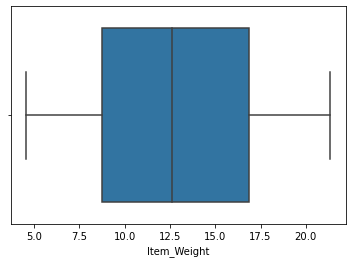

In [11]:
ax_tr = sns.boxplot(x = df_train['Item_Weight'])

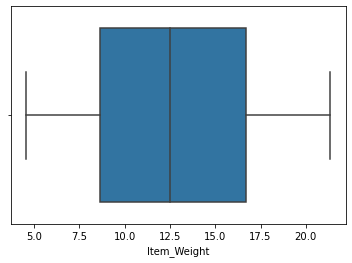

In [12]:
ax_te = sns.boxplot(x = df_test['Item_Weight'])

1416 of 8523 weight records are null. As this is a greater propotion, dropping those records will reduce the amount of data for model development. 
Therefore we have to either replace the values with 0, Mean, Median or any other statistic.
Replacing the Weight values with 0 will not be suitable in this as the weight cannot be 0.
As there are no much outliers present (as on the boxplot) it is advisable to replace with mean. (Mean is sensitive to outliers)
When there are outliers present, it is advisable to replace the missing values with median.  

In [13]:
#replacing null weight values with mean

train_mean = df_train['Item_Weight'].mean()
test_mean = df_test['Item_Weight'].mean()

print(train_mean)
print(test_mean)

12.857645184136183
12.695633368756374


In [14]:
df_train['Item_Weight'] = df_train['Item_Weight'].fillna(train_mean)
df_test['Item_Weight'] = df_test['Item_Weight'].fillna(test_mean)

In [15]:
df_train['Item_Weight'].isnull().sum(),df_test['Item_Weight'].isnull().sum()

(0, 0)

#### 2 - OUTLET SIZE null value replacing

Outlet size is a categorical value. It is advicable to replace with the mode

In [16]:
train_mode = df_train['Outlet_Size'].mode()
test_mode = df_test['Outlet_Size'].mode()

print("Training set mode : {}".format(train_mode[0]))
print("Test set mode : {}".format(test_mode[0]))

Training set mode : Medium
Test set mode : Medium


In [17]:
df_train['Outlet_Size'] = df_train['Outlet_Size'].fillna(train_mode[0])
df_test['Outlet_Size'] = df_test['Outlet_Size'].fillna(test_mode[0])

In [18]:
df_train['Outlet_Size'].isnull().sum(),df_test['Outlet_Size'].isnull().sum()

(0, 0)

In [19]:
print('train set\n')
print(df_train.isnull().sum())
print('\ntest set\n')
print(df_test.isnull().sum())

train set

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

test set

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


## Exploratory Data Analysis

In [20]:
cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [21]:
print(df_train['Item_Fat_Content'].unique()) 
print('\n')
print(df_train['Outlet_Size'].unique())
print('\n')
print(df_train['Item_Type'].unique())
print('\n')
print(df_train['Outlet_Location_Type'].unique())
print('\n')
print(df_train['Outlet_Type'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


['Medium' 'High' 'Small']


['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


['Tier 1' 'Tier 3' 'Tier 2']


['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [22]:
df_train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [23]:
df_train['Years_Established'] = df_train['Outlet_Establishment_Year'].apply(lambda x: 2021 - x) 
df_test['Years_Established'] = df_test['Outlet_Establishment_Year'].apply(lambda x: 2021 - x)

In [24]:
num.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

### Univariate Analysis - Numerical fields

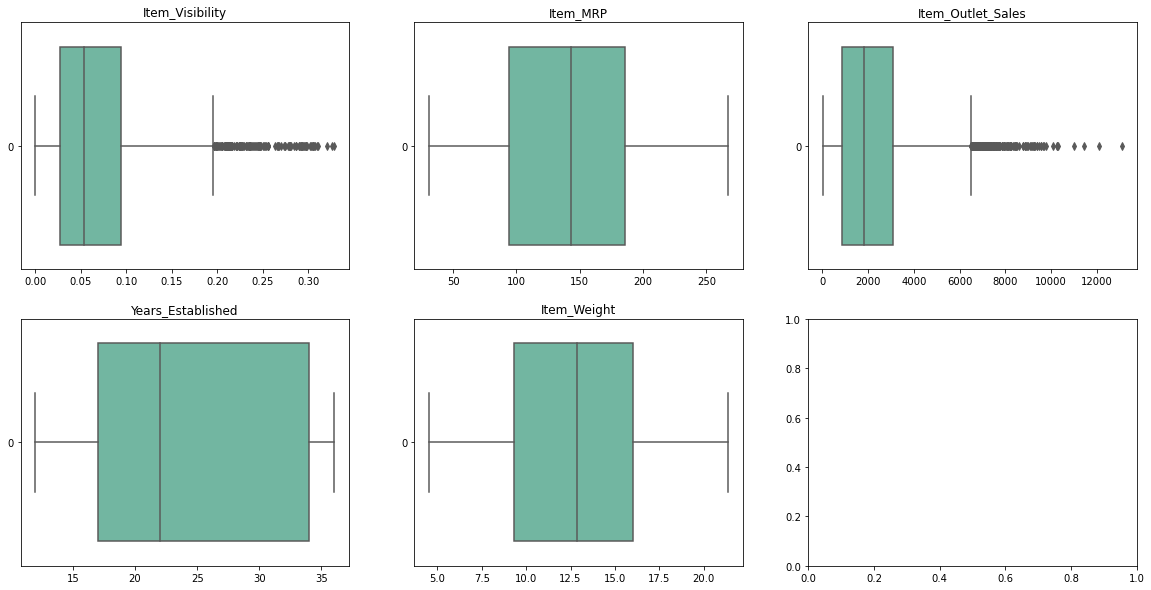

In [25]:
fig, axs = plt.subplots(2,3,figsize=(20, 10))
ax = sns.boxplot(data=df_train['Item_Visibility'], orient="h", palette="Set2",ax=axs[0,0]).set_title('Item_Visibility')
ax = sns.boxplot(data=df_train['Item_MRP'], orient="h", palette="Set2",ax=axs[0,1]).set_title('Item_MRP')
ax = sns.boxplot(data=df_train['Years_Established'], orient="h", palette="Set2",ax=axs[1,0]).set_title('Years_Established')
ax = sns.boxplot(data=df_train['Item_Weight'], orient="h", palette="Set2",ax=axs[1,1]).set_title('Item_Weight')
ax = sns.boxplot(data=df_train['Item_Outlet_Sales'], orient="h", palette="Set2",ax=axs[0,2]).set_title('Item_Outlet_Sales')

Observation : Item visibility and item_outlet_sales fields are having many outlier values

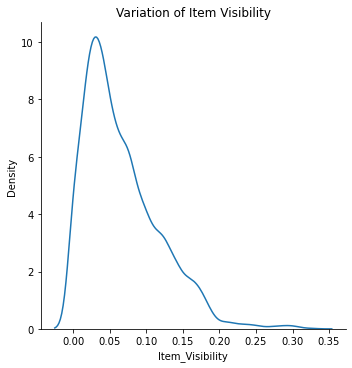

In [26]:
sns.displot(df_train['Item_Visibility'],kind="kde").set(title='Variation of Item Visibility')

### Univariate Analysis - Categorical Variables

In [27]:
cat.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

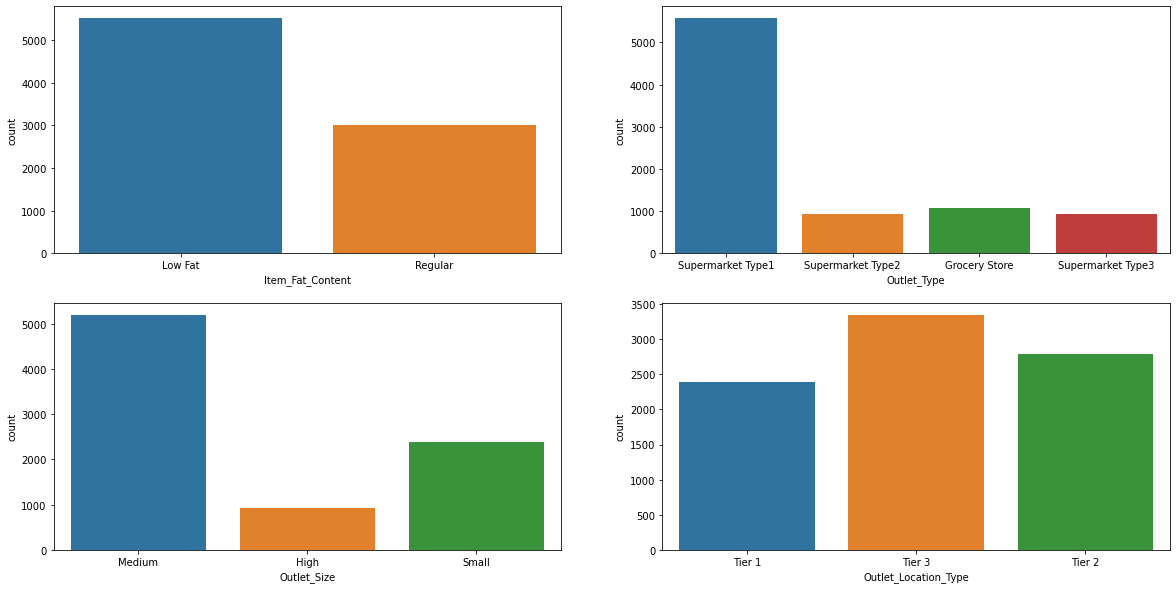

In [28]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
sns.countplot('Item_Fat_Content', data = df_train, ax=axs[0,0])
sns.countplot('Outlet_Type', data = df_train, ax=axs[0,1])
sns.countplot('Outlet_Size', data = df_train, ax=axs[1,0])
sns.countplot('Outlet_Location_Type', data = df_train, ax=axs[1,1])

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

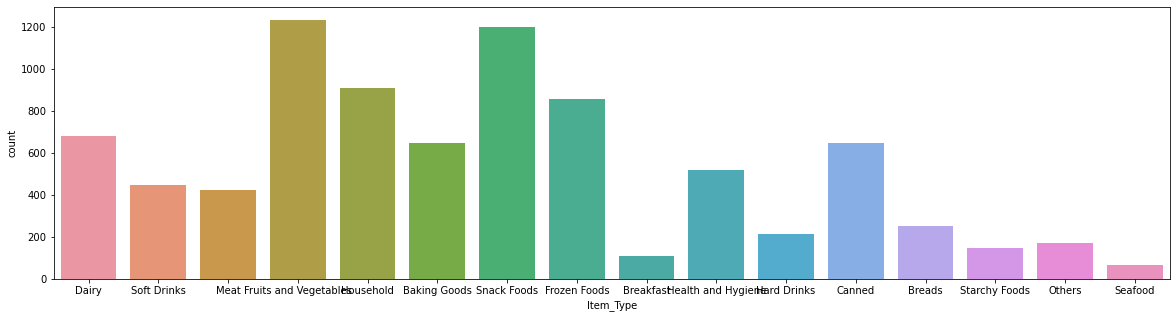

In [29]:
plt.figure(figsize=(20,5))
sns.countplot('Item_Type', data = df_train)

### Bivariate Analysis - Categorical Variables and outlet sales

In [30]:
cat.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

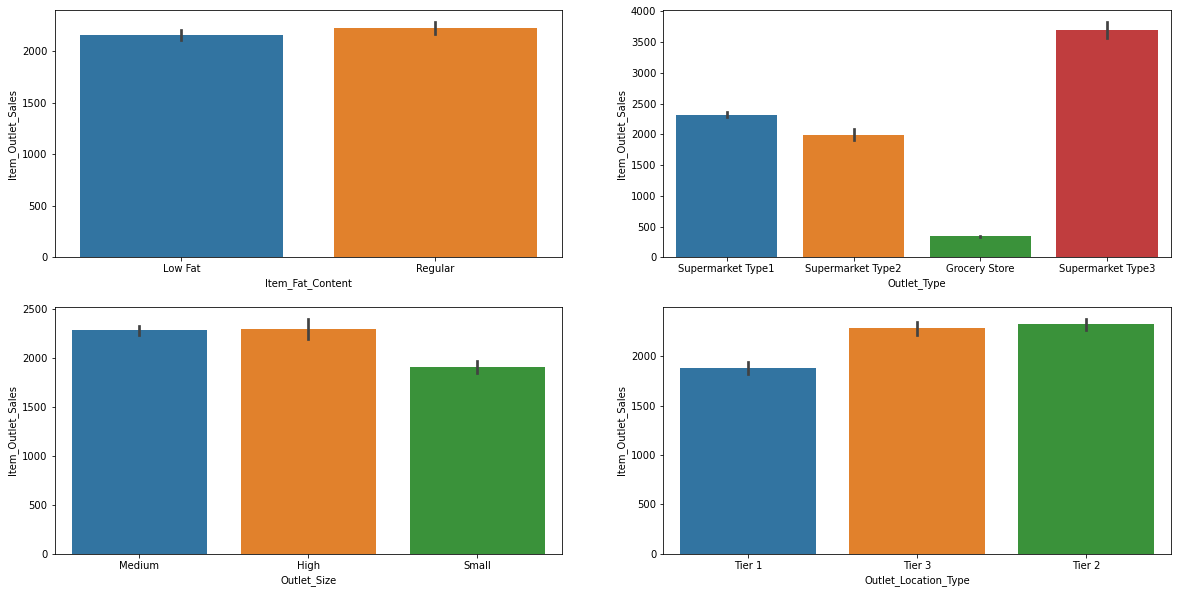

In [31]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
sns.barplot('Item_Fat_Content', 'Item_Outlet_Sales', data = df_train, ax=axs[0,0])
sns.barplot('Outlet_Type', 'Item_Outlet_Sales', data = df_train, ax=axs[0,1])
sns.barplot('Outlet_Size', 'Item_Outlet_Sales', data = df_train, ax=axs[1,0])
sns.barplot('Outlet_Location_Type', 'Item_Outlet_Sales', data = df_train, ax=axs[1,1])

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

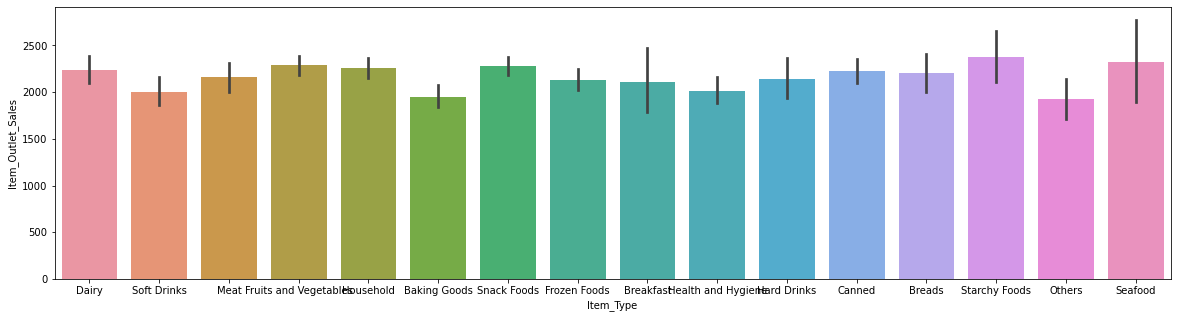

In [32]:
plt.figure(figsize=(20,5))
sns.barplot('Item_Type', 'Item_Outlet_Sales', data = df_train )

Observation : Supermarket size3 shows a considerable majority in item_outlet_sales

### Bivariate Analysis - Numerical Variables and outlet sales

In [33]:
num.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:xlabel='Years_Established', ylabel='Item_Outlet_Sales'>

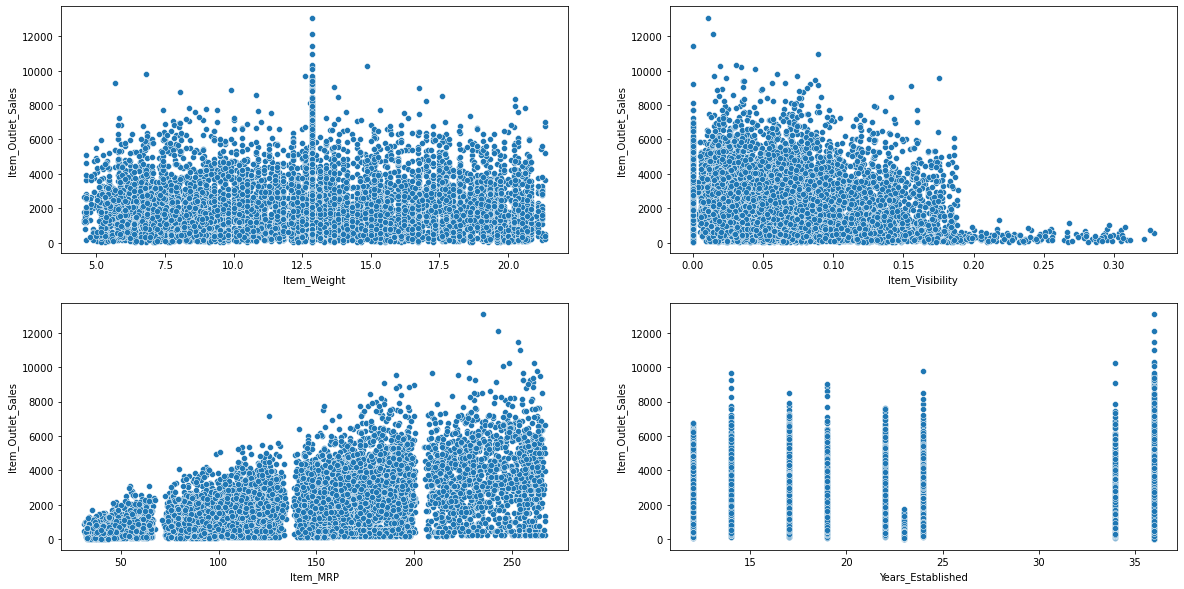

In [34]:
fig, axs = plt.subplots(2,2,figsize=(20, 10))
sns.scatterplot('Item_Weight', 'Item_Outlet_Sales', data = df_train, ax=axs[0,0])
sns.scatterplot('Item_Visibility', 'Item_Outlet_Sales', data = df_train, ax=axs[0,1])
sns.scatterplot('Item_MRP', 'Item_Outlet_Sales', data = df_train, ax=axs[1,0])
sns.scatterplot('Years_Established', 'Item_Outlet_Sales', data = df_train, ax=axs[1,1])

observation : 
* Item visibility shows a weak negative corrrelation for item outlet sales. 
* Item_MRP shows a weak positive correlation to item outlet sales.

There are items having higher visibility and very less sales

Availability : Fruits & Veg > Snack foods > Households
Sales : Starchy > Seafood > Fruits & Veg, Snacks, Diary, Household

Dairy, Starchy and Seafood have very less avilability (item count). But when sales are considered, their sales are higher

Let's check whether there are any 0 values in Item weight, Item visibiity, Item_MRP. In the business case item weight cannot be zero. Item visibility can be zero if sales amount is also zero. Item_MRP can be zero if the sales have been done on a 'buy one get 1 free' discount.

In [35]:
df_train[df_train['Item_Visibility'] == 0].shape #526 item-outlet combinations have 0 item visibility

(526, 13)

In [36]:
df_train[df_train['Item_Weight'] == 0].shape #none of the items have zero weight

(0, 13)

In [37]:
df_train[df_train['Item_MRP'] == 0].shape #none of the items have zero price

(0, 13)

In [38]:
df_train['Item_Visibility'] = df_train['Item_Visibility'].replace(0,df_train['Item_Visibility'].mean())
df_test['Item_Visibility'] = df_test['Item_Visibility'].replace(0,df_test['Item_Visibility'].mean())

In [39]:
#df_train[df_train['Item_Visibility'] == 0].shape 

### Model Development

<img src = "files/Classification-of-machine-learning-algorithms-Generalized-linear-model-GLM-Support.png">

This is a supervised learning problem as we have labelled data in our training set. As we are predicting the sales amount which is a numerical output, a regression algorythm can be used in this usecase

I found this article useful for selecting a ML algorythm for regression : https://towardsdatascience.com/selecting-the-best-machine-learning-algorithm-for-your-regression-problem-20c330bad4ef

#### Treating outliers 

On our EDA we found many outliers for the features 'Item visibility' and 'Item_outlet_sales'. Let us treat those outliers before applying to the model.
Extreme values in independent variables are called 'high leverage' points.
Extreme values in target variable are called 'outliers'.

* Outliers - Normally remove
* Novelties - Used for anomaly detection (credit card frauds, fake calls etc)

3 main approaches for outlier removal 
* Boxplot (within Q1-1.5IQR and Q3+1.5IQR)
* Cook's Distance - used mainly in linear regression
* Z- Score method (greater than 2 is considered outliers)

For multivariate and high dimensional data 
* PCA
* Local Outlier Factor
* Density based outlier ranking 

methods can be used.

Refer : https://heartbeat.fritz.ai/how-to-make-your-machine-learning-models-robust-to-outliers-44d404067d07

##### If we are not dropping the records (if dropping will drastically reduce the amount of data) what other methods we can use to treat outliers? 

* Winsorizing - setting up extreme values
* Log scale tranformation (when to not use log : https://stats.stackexchange.com/questions/130262/why-not-log-transform-all-variables-that-are-not-of-main-interest)
* Binning - categorizing into more/ lesser bins
* Model based methods - use a different model

!!! Linear models are more impacted with outliers.
Tree based methods like random forest and Gradient boosting techniques are less impacted by outliers.

Reason : https://www.quora.com/Why-are-tree-based-models-robust-to-outliers

<img src = "files/outlier results.PNG">

In my approach I am planning to apply linear regression, polinomial regression, random forest and XGBoost algorithms. I will first feed the algorithms with 'Outliers included' dataset. Then I will feed the algorithms with 'Outler treated' dataset. Finally I will compare the results from both the approaches. Please not that this is for my learning purposes. One can proceed with any of the methods.

In [40]:
cat.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

To input to the model, categorical variables should be encoded (with numerical values). 

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#these should be imported at the beginning following the best practices
#included here to follow the learning flow

In [42]:
le = LabelEncoder()

to_encode = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']

for i in to_encode:
    df_train[i] = le.fit_transform(df_train[i])
    df_test[i] = le.fit_transform(df_test[i])

In [43]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,22
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,12
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,22
3,FDX07,19.20,1,0.066132,6,182.0950,OUT010,1998,1,2,0,732.3800,23
4,NCD19,8.93,0,0.066132,9,53.8614,OUT013,1987,0,2,1,994.7052,34


<AxesSubplot:>

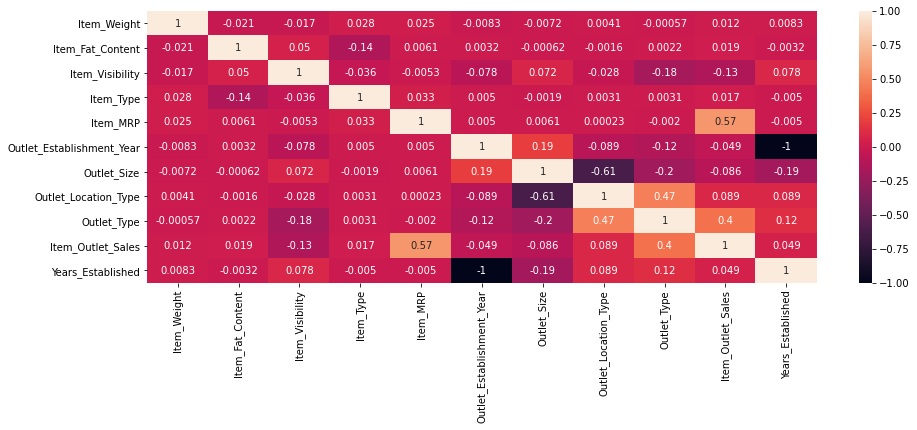

In [46]:
#let's have a look at the correlations between these fields

corr = df_train.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True )

observation : Item MRP has a positive correlation to outlet sales. The next feature having a considerable correlation towards sales is the outlet type. 

Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year fields does not add any added advantage to the model output. They are not features just identifiers. Thus, before feeding data to the model, these should be dropped. 

In [48]:
m1_train = df_train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
m1_test= df_test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [51]:
#seperate the dataset into training and validation sets (80:20)

X =  m1_train[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Years_Established']]
y =  m1_train['Item_Outlet_Sales']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)